#### **PART 01 Data Loading:**

**The Work Mythology in Part 01 Data Loading and Intial Cleaning:**

>**Steps:**
>1. Import Packages
>2. Ensuring Folder Structure, a main file named data, and subfolders: Raw and Clean.
>3. Download files from the Web into a raw file in the home repository
>4. Additional Data loading, such as converting and unzipping a  file
>5. Identifying which columns to keep from raw file structure
>6. Build CLEAN versions in data/clean (from RAW)
>7.  Load from data/clean with selected columns
>8.  Clean column names function that does the initial cleaning on the data before in-depth analysis

Write about source of data > what it contains whats its problem and what do you wish to do with.

In [1]:
# Step 01 - Import packages needed for analysis
import os
import urllib.request
import zipfile
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Step 02 - Ensuring Folder Structure: Create a main file named data and subfolders named raw and clean.
def ensure_data_folders():
    folders = ["data/raw", "data/clean"]
    
    for folder in folders:
        if not os.path.isdir(folder):
            os.makedirs(folder)
            print(f"Created folder: {folder}")
        else:
            print(f"Folder already exists: {folder}")

    print("--" * 30)

ensure_data_folders()

Folder already exists: data/raw
Folder already exists: data/clean
------------------------------------------------------------


In [2]:
# Step 03 - Download files from the Web into a raw file on the home repository
    # Please Note: The gitignore file includes the whole of the data file so that you won't see this file in the main repo

# function that downloads  files into raw only if they don't exist
def download_if_missing(url, local_name):
    dest = os.path.join("data", "raw", local_name)
    
    print(f"Let me check: {local_name}")

    if os.path.isfile(dest):
        print("File already exists — skipping download.")
    else:
        print(f"Downloading from:\n    {url}")
        urllib.request.urlretrieve(url, dest)
        print("Download complete — saved.")

    print("--" * 20)
    return dest 

# attribute url path to a variable Source: Prof. Jon Reades from the CASA department at UCL
base = "https://orca.casa.ucl.ac.uk/~jreades/data/"

# files we wish to download  from that path 
orca_files = [
    
    "20250615-London-listings.csv.gz",
    # ^ Airbnb listings from calendar "screenshot" 15/June/2025 (comma-separated values)
    "MSOA-2011.gpkg" 
    # ^ Middle-Layer Super Output Area for London (Spatial file)
]

# Extra files we saw necessary to add for further analysis (Outside the scope offered by Prof. Reades)
extra_files = {
    
    "housing_msoa.csv":
        "https://data.london.gov.uk/download/2z0yn/20264159-36cb-4aa2-8371-ae884ae83e88/msoa-data.csv",
        # ^ Housing data by MSOA boundaries to evaluate how many households are in a jurisdictional boundary (comma-separated values)    
        
    "local-authority-rents-borough.xlsx":
        "https://data.london.gov.uk/download/2g1k1/2a74e893-3188-4cb8-b5a7-087a1965b623/local-authority-rents-borough.xlsx",
        # ^ Average Weekly Rent according to Borough (Excel must transform to comma-separated values)
    "london_boroughs.zip":
        "https://data.london.gov.uk/download/20od9/08d31995-dd27-423c-a987-57fe8e952990/London-wards-2018.zip",
        # ^ Borough Boundary of London (Spatial file)
    
    "council_tax_borough.xlsx":
        "https://data.london.gov.uk/download/expnl/59cc7c37-da8f-4158-bc47-491c3d167b05/council-tax-bands-borough.xlsx"
        # ^ Council Tax per Borough Band D (Excel must transform to comma-separated values)
}

local_paths = [] # Open List for later for-loop

# Orca files download to raw file
print("!STARTING ORCA DOWNLOADS!")
for fname in orca_files:
    url = base + fname
    path = download_if_missing(url, fname) 
    local_paths.append(path)

# Extra files download to raw file
print("!STARTING DATASTORE DOWNLOADS!")
for local_name, url in extra_files.items():
    path = download_if_missing(url, local_name)
    local_paths.append(path)

!STARTING ORCA DOWNLOADS!
Let me check: 20250615-London-listings.csv.gz
File already exists — skipping download.
----------------------------------------
Let me check: MSOA-2011.gpkg
File already exists — skipping download.
----------------------------------------
!STARTING DATASTORE DOWNLOADS!
Let me check: housing_msoa.csv
File already exists — skipping download.
----------------------------------------
Let me check: local-authority-rents-borough.xlsx
File already exists — skipping download.
----------------------------------------
Let me check: london_boroughs.zip
File already exists — skipping download.
----------------------------------------
Let me check: council_tax_borough.xlsx
File already exists — skipping download.
----------------------------------------


In [3]:
# Step 04 -  Additional Data loading, such as converting Excel to CSV and unzipping a file
#            in condition that the files hasent done this

# Convert the Rent file from Excel to CSV
print("!CONVERTING RENT EXCEL (Local Authority Sheet) TO CSV!")
    
excel_path = "data/raw/local-authority-rents-borough.xlsx"
csv_path   = "data/raw/local-authority-rents-borough.csv"

if os.path.isfile(csv_path):
    print(f"CSV already exists, skipping conversion: {csv_path}")
else:
    if not os.path.isfile(excel_path):
        print(f"Excel file not found: {excel_path}")
    else:
        rents_xlsx = pd.read_excel(
            excel_path,
            sheet_name="Local Authority Rents"
        )
        rents_xlsx.to_csv(csv_path, index=False)
        print(f"Converted Excel to CSV: {csv_path}")

print("--" * 20)


# Convert Council Tax file from Excel to CSV
print("!CONVERTING COUNCIL TAX EXCEL (2024-2025) TO CSV!")

excel_path = "data/raw/council_tax_borough.xlsx"
csv_path   = "data/raw/council_tax_borough.csv"

if os.path.isfile(csv_path):
    print(f"CSV already exists, skipping conversion: {csv_path}")
else:
    if not os.path.isfile(excel_path):
        print(f"Excel file not found: {excel_path}")
    else:
        tax_xlsx = pd.read_excel(
            excel_path,
            sheet_name="2024-25"
        )
        tax_xlsx.to_csv(csv_path, index=False)
        print(f"Converted Excel to CSV: {csv_path}")

print("--" * 20)

print("!UNZIPPING LONDON BOROUGHS SHAPEFILE!")

# unzipping Shape File of London Borough
zip_path = "data/raw/london_boroughs.zip"
if os.path.isfile(zip_path):
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall("data/raw/")
    print("Unzipped london_boroughs.zip")
else:
    print("Zip file not found: data/raw/london_boroughs.zip")

print("--" * 20)

!CONVERTING RENT EXCEL (Local Authority Sheet) TO CSV!
CSV already exists, skipping conversion: data/raw/local-authority-rents-borough.csv
----------------------------------------
!CONVERTING COUNCIL TAX EXCEL (2024-2025) TO CSV!
CSV already exists, skipping conversion: data/raw/council_tax_borough.csv
----------------------------------------
!UNZIPPING LONDON BOROUGHS SHAPEFILE!
Unzipped london_boroughs.zip
----------------------------------------


In [4]:
# Step 05 - Identifying which columns to keep from raw file structure

# Columns needed for listings 
cols_listings = [
    'id', 'listing_url', 'last_scraped', 'name', 
    'description', 'host_id', 'host_since', 'host_is_superhost', 
    'host_listings_count', 'host_total_listings_count',
    'neighbourhood_cleansed', 'latitude', 'longitude', 
    'property_type', 'room_type', 'accommodates', 
    'price', 'minimum_nights', 'maximum_nights', 
    'minimum_minimum_nights','maximum_minimum_nights',
    'minimum_maximum_nights','maximum_maximum_nights',
    'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
    'availability_365',
    'number_of_reviews', 
    'first_review', 'last_review',
    'review_scores_rating', 
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms',
    'reviews_per_month',
    'estimated_revenue_l365d',
    'estimated_occupancy_l365d'
]

# Housing (2011 only)*** The housing  is only from 2011 add as a problem for the ddata
cols_housing = ["Middle Super Output Area",
                 "MSOA Name",
                 "Households (2011);All Households;"
                 ]

# Rent: only latest year >>> change to nadia
cols_rent = ["Code",
              "New Code",
              "Area",
              "2023-24"
             ]

# Council tax: band D comparison as it is the Band used as reference by the GLA !!! ADD REF
cols_tax = [
    "Code",
    "Local authority",
    "Band D"
]

In [5]:
# Step 06 -  Build CLEAN versions in data/clean (from RAW)
# Each File goes through the raw version and into clean which would allow us to manipulate the data without losing the raw

print("!CREATING CLEAN VERSIONS!")

# Save listings into a clean file
raw_listings_path = "data/raw/20250615-London-listings.csv.gz"
clean_listings_path = "data/clean/20250615-London-listings.csv.gz"

if not os.path.isfile(clean_listings_path):
    listings_raw = pd.read_csv(
        raw_listings_path,
        compression="gzip",
        encoding="latin1",
        low_memory=False
    )
    listings = listings_raw[cols_listings]
    listings.to_csv(
        clean_listings_path,
        index=False,
        compression="gzip"
    )
    print("Saved cleaned listings to data/clean")
else:
    print("Clean listings already exist, skipping.")

# save MSOA into clean file
raw_msoa_path = "data/raw/MSOA-2011.gpkg"
clean_msoa_path = "data/clean/MSOA-2011.gpkg"

if not os.path.isfile(clean_msoa_path):
    msoa = gpd.read_file(raw_msoa_path)
    msoa.to_file(clean_msoa_path, driver="GPKG")
    print("Saved MSOA to data/clean")
else:
    print("Clean MSOA already exists, skipping.")

# Save Rent into clean file (already converted to CSV in raw)
raw_rent_path = "data/raw/local-authority-rents-borough.csv"
clean_rent_path = "data/clean/local-authority-rents-borough.csv"

if not os.path.isfile(clean_rent_path):
    rent_raw = pd.read_csv(raw_rent_path, encoding="latin1", low_memory=False)
    rent = rent_raw[cols_rent]
    rent.to_csv(clean_rent_path, index=False)
    print("Saved cleaned rent to data/clean")
else:
    print("Clean rent already exists, skipping.")

# Save Housing into clean file
raw_housing_path = "data/raw/housing_msoa.csv"
clean_housing_path = "data/clean/housing_msoa.csv"

if not os.path.isfile(clean_housing_path):
    housing_raw = pd.read_csv(raw_housing_path, encoding="latin1", low_memory=False)
    housing = housing_raw[cols_housing]
    housing.to_csv(clean_housing_path, index=False)
    print("Saved cleaned housing to data/clean")
else:
    print("Clean housing already exists, skipping.")

# Save Borough and Wards into a clean file
borough_clean_dir = "data/clean/London-wards-2018_ESRI"
os.makedirs(borough_clean_dir, exist_ok=True)

# this path depends on how the zip unzips 
raw_borough_path = "data/raw/London-wards-2018_ESRI/London_Ward.shp"

clean_borough_path = os.path.join(borough_clean_dir, "London_Ward.shp")

if not os.path.isfile(clean_borough_path):
    borough = gpd.read_file(raw_borough_path)
    borough.to_file(clean_borough_path)
    print("Saved borough shapefile to data/clean")
else:
    print("Clean borough shapefile already exists, skipping.")

# Save Council Tax file into clean file
raw_tax_path = "data/raw/council_tax_borough.csv"
clean_tax_path = "data/clean/council_tax_borough.csv"

if not os.path.isfile(clean_tax_path):
    council_tax_raw = pd.read_csv(raw_tax_path, encoding="latin1", low_memory=False)
    council_tax = council_tax_raw[cols_tax]
    council_tax.to_csv(clean_tax_path, index=False)
    print("Saved cleaned council tax to data/clean")
else:
    print("Clean council tax already exists, skipping.")

print("**All cleaned files saved to data/clean/**")


!CREATING CLEAN VERSIONS!
Clean listings already exist, skipping.
Clean MSOA already exists, skipping.
Clean rent already exists, skipping.
Clean housing already exists, skipping.
Clean borough shapefile already exists, skipping.
Clean council tax already exists, skipping.
**All cleaned files saved to data/clean/**


In [6]:
# Step 07 -  Load from data/clean with selected columns and attirbute to a value 

print("!LOADING FILES (SELECTED COLUMNS ONLY)!")

# Load Listings
listings = pd.read_csv(
    "data/clean/20250615-London-listings.csv.gz",
    compression="gzip",
    usecols=cols_listings,
    encoding="latin1",
    low_memory=False
)
print(f"Step 01: listings loaded: {listings.shape[0]:,} rows, {listings.shape[1]} columns")

# Load MSOA
msoa = gpd.read_file("data/clean/MSOA-2011.gpkg")
print(f"Step 02: msoa loaded: {msoa.shape[0]:,} polygons, {msoa.shape[1]} columns")

# Rent
rent = pd.read_csv(
    "data/clean/local-authority-rents-borough.csv",
    usecols=cols_rent,
    encoding="latin1",
    low_memory=False
)
print(f"Step 03: rent loaded: {rent.shape[0]:,} rows, {rent.shape[1]} columns")

# Load Housing
housing = pd.read_csv(
    "data/clean/housing_msoa.csv",
    usecols=cols_housing,
    encoding="latin1",
    low_memory=False
)
print(f"Step 04: housing loaded: {housing.shape[0]:,} rows, {housing.shape[1]} columns")

# Load Borough boundary polygons
borough = gpd.read_file("data/clean/London-wards-2018_ESRI/London_Ward.shp")
print(f"Step 05: borough loaded: {borough.shape[0]:,} polygons, {borough.shape[1]} columns")

# Load Council Tax
council_tax = pd.read_csv(
    "data/clean/council_tax_borough.csv",
    usecols=cols_tax,
    encoding="latin1",
    low_memory=False
)
print(f"Step 06: council tax loaded: {council_tax.shape[0]:,} rows, {council_tax.shape[1]} columns")


# Print this when done
print("**All selected files successfully loaded.**")

!LOADING FILES (SELECTED COLUMNS ONLY)!
Step 01: listings loaded: 96,651 rows, 37 columns
Step 02: msoa loaded: 983 polygons, 13 columns
Step 03: rent loaded: 46 rows, 4 columns
Step 04: housing loaded: 984 rows, 3 columns
Step 05: borough loaded: 657 polygons, 7 columns
Step 06: council tax loaded: 34 rows, 3 columns
**All selected files successfully loaded.**


In [7]:
# Step 08 - Clean column names function that does the initial cleaning on the data before in-depth analysis

# Create a function clean_names that runs through the data frame
def clean_names(df):
    df = df.copy()
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace(r"[^\w]", "", regex=True)
        .str.replace(",", "", regex=False)
    )
    return df

# turn data frame into a dictionary for fast cleaning
dfs = {
    "listings": listings,
    "msoa": msoa,
    "rent": rent,
    "housing": housing,
    "borough": borough,
    "council_tax": council_tax
}
for name, frame in dfs.items():
    dfs[name] = clean_names(frame)
    print(f"Cleaned column names for: {name}")

# Reverse the dictionary back to individual data frames 
listings     = dfs["listings"]
msoa         = dfs["msoa"]
rent         = dfs["rent"]
housing      = dfs["housing"]
borough      = dfs["borough"]
council_tax  = dfs["council_tax"]

Cleaned column names for: listings
Cleaned column names for: msoa
Cleaned column names for: rent
Cleaned column names for: housing
Cleaned column names for: borough
Cleaned column names for: council_tax


<Axes: >

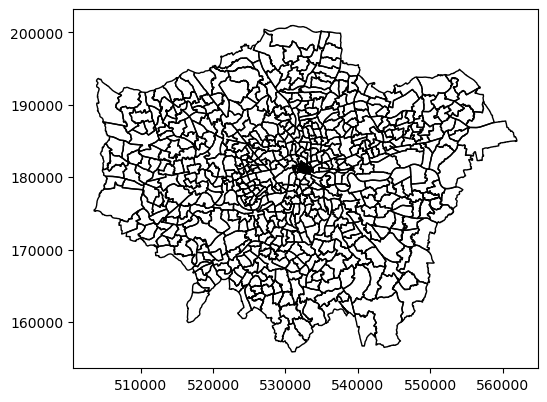

In [8]:
##### Make Sure Everything is functioning > Don't print this, please 
borough.columns
# Just to make sure its clean and not manipulated
ax = borough.plot(edgecolor='black', facecolor='none', figsize=(6,6))
ax

#### **Question 3: How many properties would be affected by the opposition’s proposal?** Emilia

In Our Evaluation, we want to create an extreme scenario to evaluate the magnitude of the effect of increased council tax: how many short-term rental properties owned by professional landlords would become unprofitable if council tax rates were increased. This requires linking landlord type, location, borough-level council tax, and the property’s estimated monthly profit, as well as evaluating companies with multiple listings and their profit-and-loss statements. 

  (300 Words)
- Short into brief
- assumptions
- problems with data
- steps
- outcome expected + Summary for each graph + titles 
- Summary general for question + Review for policy
  

**Data:**
1. Professional landlord listings (from Q2)
    - kkkk
2. Borough boundaries (spatial join)
    - kkkk
3. Borough-level council tax
    - The file has been selected by the year 2024-2025 and only filtered to Band D, which the GLA references as a starting point to evaluate the overall borough tax.
    - The value that we extract is associated with the annual tax *(column Band D, which we later rename as council tax).*
4. Monthly profit estimates for each listing
    - kkkk

**Output:** FIX THIS
1. Number of professional landlords
2. Distribution of their listings across boroughs
3. Current vs future council tax per borough
4. Number and percentage of listings becoming unprofitable
5. Scatter plot showing profit before and after tax increase and affected properties

**Issues:** FIX THIS
1. Borough-level council tax bands vary depending on property type; using averages simplifies reality.
2. Monthly profit estimates depend on assumptions about occupancy and nightly rates.
3. Listings with missing borough information must be dropped or cleaned.
4. Definition of “professional landlord” strongly shapes results.
5. The proposed % tax increase is simplified and may not reflect the real banding structure.

**The Work Mythology For Question 3:**

>**Steps:**
>1. Clean Files and Rename Columns
>2. Clean Borough Shape file and reproject CRS
>



In [10]:
# Step 01 — Clean & Align Council Tax to Shapefile

# Rename columns in council tax for easy reading
council_tax2 = council_tax.rename(columns={
    'local_authority': 'borough_name_raw',
    'band_d': 'council_tax',
    'code': 'borough_code'})

# Make sure the borough code is a string
council_tax2['borough_code'] = (
    council_tax2['borough_code']
    .astype(str)
    .str.strip())

# make sure council_tax is numeric, (what was yearly band D)
council_tax2['council_tax'] = pd.to_numeric(council_tax2['council_tax'], errors='coerce')

# drop rows where council_tax is missing value 
council_tax2 = council_tax2.dropna(subset=['council_tax'])

# Print Output of row columns and top 5 head of the rows
print("clean council tax:", council_tax2.shape)
display(council_tax2.head())

# ---- Output Data -----
# council_tax2 = Which is a cleaned and renamed version of council_tax

clean council tax: (33, 3)


,borough_code,borough_name_raw,council_tax
1,E09000001,City of London,1217.89
2,E09000002,Barking & Dagenham,2002.75
3,E09000003,Barnet,1943.24
4,E09000004,Bexley,2155.04
5,E09000005,Brent,2036.05


clean borough shapefile: (33, 3)
geom types: Polygon    33
Name: count, dtype: int64


,borough_code,geometry,borough_name
0,E09000001,"POLYGON ((-0.08904 51.50803, -0.08948 51.50809...",city and county of the city of london
1,E09000002,"POLYGON ((0.09862 51.51492, 0.09811 51.5152, 0...",barking and dagenham
2,E09000003,"POLYGON ((-0.22265 51.56353, -0.22341 51.56413...",barnet
3,E09000004,"POLYGON ((0.12634 51.41472, 0.12628 51.41477, ...",bexley
4,E09000005,"POLYGON ((-0.25603 51.53395, -0.25612 51.53434...",brent


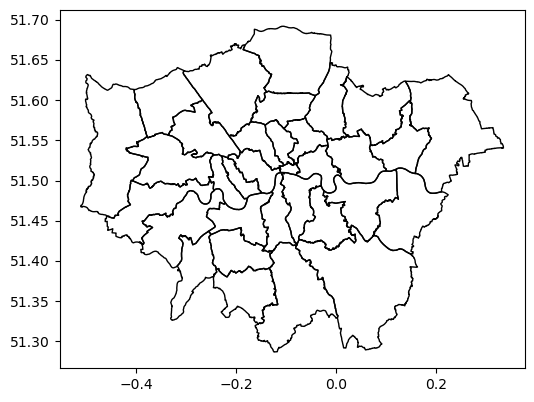

In [11]:
# Step 02 -  Clean Borough Shapefile 

# Ensure CRS is correct to match Airbnb points later
borough = borough.to_crs(epsg=4326)

# Extract borough code from lagsscode
borough['borough_code'] = (
    borough['lagsscode']
    .astype(str)
    .str.strip())

# Clean borough name from shapefile
borough['borough_name'] = (
    borough['district']
    .astype(str)
    .str.lower()
    .str.replace("&", "and", regex=False)
    .str.replace("-", " ", regex=False)
    .str.strip())

# Keep only essential columns
borough_min = borough[['borough_code', 'borough_name', 'geometry']].copy()

# Dissolve all pieces per borough_code into a single geometry (outer boundary of borough)
borough_shp = borough_min.dissolve(by='borough_code')

# Bring borough_code back as a normal column
borough_shp = borough_shp.reset_index()

print("clean borough shapefile:", borough_shp.shape)
print("geom types:", borough_shp.geom_type.value_counts())
display(borough_shp.head())

# Quick visual check
ax = borough_shp.plot(edgecolor='black', facecolor='none', figsize=(6, 6))

# ---- Output Data -----
# borough_shp = Which is a cleaned, outer boundary (dissolved) shape file of the boroughs. 

In [12]:
# Step 3 - Merge Council Tax Into Borough Shapefile

# Merge the shape file borough_shp with council_tax2 through a left join with the borough code value as a shared id
borough_tax = borough_shp.merge(
    council_tax2[['borough_code', 'council_tax']],
    on='borough_code',
    how='left'
)

print("borough_tax merged:", borough_tax.shape)
print("missing council tax:", borough_tax['council_tax'].isna().sum()) # make sure that all boundries have been attributed council tax
display(borough_tax.head())

# ---- Output Data -----
# borough_tax = Merged spatial file with council tax data

borough_tax merged: (33, 4)
missing council tax: 0


,borough_code,geometry,borough_name,council_tax
0,E09000001,"POLYGON ((-0.08904 51.50803, -0.08948 51.50809...",city and county of the city of london,1217.89
1,E09000002,"POLYGON ((0.09862 51.51492, 0.09811 51.5152, 0...",barking and dagenham,2002.75
2,E09000003,"POLYGON ((-0.22265 51.56353, -0.22341 51.56413...",barnet,1943.24
3,E09000004,"POLYGON ((0.12634 51.41472, 0.12628 51.41477, ...",bexley,2155.04
4,E09000005,"POLYGON ((-0.25603 51.53395, -0.25612 51.53434...",brent,2036.05


In [25]:
# Step 04 - Clean & Filter Listings for Full-Time Entire Homes

# Ensure numeric columns just because the data has been used beforehand ######
num_cols = [
    'availability_365',
    'estimated_occupancy_l365d',
    'estimated_revenue_l365d',
    'host_total_listings_count',
    'latitude',
    'longitude'
]

for col in num_cols:
    listings[col] = pd.to_numeric(listings[col], errors='coerce')

# Normalise room_type #######3
listings['room_type'] = listings['room_type'].str.lower().str.strip()

# Professional host flag ####
listings['is_professional_host'] = listings['host_total_listings_count'] > 1


#### Maybe starts From Here

# Keep only columns needed for Q3
cols_needed = [
    'id',
    'host_id',
    'latitude',
    'longitude',
    'price',
    'availability_365',
    'estimated_occupancy_l365d',
    'estimated_revenue_l365d',
    'host_total_listings_count',
    'room_type',
    'is_professional_host'
]
# Create a Copy named listings_q3
listings_q3 = listings[cols_needed].copy()

# Make sure rows with missing IDs are dropped (Extra Safety)
before_id_drop = len(listings_q3) # text output
listings_q3 = listings_q3.dropna(subset=['id', 'host_id'])
after_id_drop = len(listings_q3) # text output
removed_id_rows = before_id_drop - after_id_drop # How many listings with na values have we droped? Hopefully 0
print(f"Removed {removed_id_rows} rows with missing id/host_id")

# Drop rows with missing coordinates (can't map/join them)
before_coord_drop = len(listings_q3) # text output
listings_q3 = listings_q3.dropna(subset=['latitude', 'longitude'])
after_coord_drop = len(listings_q3) # text output
removed_coord_rows = before_coord_drop - after_coord_drop # How many listings with na values have we droped? Hopefully 0
print(f"Removed {removed_coord_rows} rows with missing coordinates")

# Filter to entire homes only according to mythology in Q2 ##############
listings_entire = listings_q3[
    listings_q3['room_type'] == "entire home/apt"
].copy()

# Filter to full-time (90+ days available) according to mythology in Q2 ###########
listings_fulltime = listings_entire[
    listings_entire['availability_365'] > 90 
].copy()

# Explicit annual revenue column from Airbnb data #########^^^^^
# The Column is calculated by Airbnb (the price per night multiplied by the estimated occupancy out of 365 days).
# We treat the estimated 365-day revenue as annual revenue 
listings_fulltime['annual_revenue'] = listings_fulltime['estimated_revenue_l365d']

print("full-time entire homes:", listings_fulltime.shape)
display(listings_fulltime.head())

# ---- Output Data -----
# listings_q3 = contains Airbnb listing data cleaned and filtered by columns only for Q3
# listings_entire = Subset 1 of listings_q3 filtered by entire home and apartment
# listings_fulltime = Subset 2 from listings_entire filtered by availability for more than 90 days

Removed 0 rows with missing id/host_id
Removed 0 rows with missing coordinates
full-time entire homes: (32616, 12)


,id,host_id,latitude,longitude,price,availability_365,estimated_occupancy_l365d,estimated_revenue_l365d,host_total_listings_count,room_type,is_professional_host,annual_revenue
0,264776,1389063,51.44306,-0.01948,$297.00,293,110,32670.0,12.0,entire home/apt,True,32670.0
1,264777,1389063,51.44284,-0.01997,$98.00,318,37,3626.0,12.0,entire home/apt,True,3626.0
2,264778,1389063,51.44359,-0.02275,$148.00,302,55,8140.0,12.0,entire home/apt,True,8140.0
3,264779,1389063,51.44355,-0.02309,$144.00,328,64,9216.0,12.0,entire home/apt,True,9216.0
4,264780,1389063,51.44333,-0.02307,$157.00,255,37,5809.0,12.0,entire home/apt,True,5809.0


full-time listings total: 32616
full-time listings inside London bbox: 32616
after spatial join: (32616, 17)
listings missing council tax after join: 0
dropped unmatched listings: 0
after dropping unmatched listings: (32616, 17)


,id,host_id,latitude,longitude,price,availability_365,estimated_occupancy_l365d,estimated_revenue_l365d,host_total_listings_count,room_type,is_professional_host,annual_revenue,geometry,index_right,borough_code,borough_name,council_tax
0,264776,1389063,51.44306,-0.01948,$297.00,293,110,32670.0,12.0,entire home/apt,True,32670.0,POINT (-0.01948 51.44306),22,E09000023,lewisham,2037.98
1,264777,1389063,51.44284,-0.01997,$98.00,318,37,3626.0,12.0,entire home/apt,True,3626.0,POINT (-0.01997 51.44284),22,E09000023,lewisham,2037.98
2,264778,1389063,51.44359,-0.02275,$148.00,302,55,8140.0,12.0,entire home/apt,True,8140.0,POINT (-0.02275 51.44359),22,E09000023,lewisham,2037.98
3,264779,1389063,51.44355,-0.02309,$144.00,328,64,9216.0,12.0,entire home/apt,True,9216.0,POINT (-0.02309 51.44355),22,E09000023,lewisham,2037.98
4,264780,1389063,51.44333,-0.02307,$157.00,255,37,5809.0,12.0,entire home/apt,True,5809.0,POINT (-0.02307 51.44333),22,E09000023,lewisham,2037.98


<Axes: >

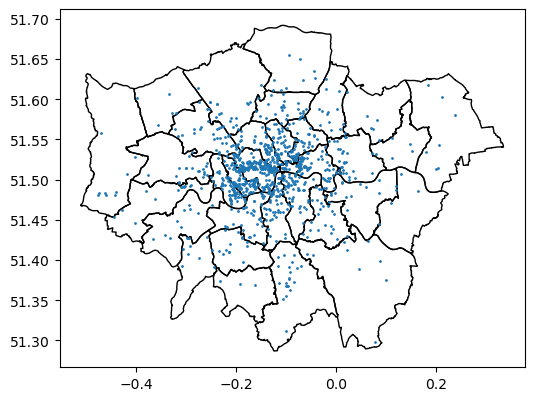

In [26]:
# Step 05 - Spatial Join Listings to Borough Tax Data (clean)

# Make sure borough_tax CRS is correct according to World Geodetic System 1984
borough_tax = borough_tax.to_crs(epsg=4326) # what we did before was for borough, not borough_tax

# Filter listings_fulltime to the London bounding box
# First, calculate the bounding box by maximum and minimum values of the borough boundaries
minx, miny, maxx, maxy = borough_tax.total_bounds

in_london_bbox = (
    (listings_fulltime['longitude'] >= minx) &
    (listings_fulltime['longitude'] <= maxx) &
    (listings_fulltime['latitude']  >= miny) &
    (listings_fulltime['latitude']  <= maxy)
)

print("full-time listings total:", len(listings_fulltime))
print("full-time listings inside London bbox:", in_london_bbox.sum())

# make sure all listings point are within the bounding box
listings_fulltime_london = listings_fulltime[in_london_bbox].copy()

# Create GeoDataFrame from these listings within the London bounding box
listings_gdf = gpd.GeoDataFrame(
    listings_fulltime_london.copy(),
    geometry=gpd.points_from_xy(
        listings_fulltime_london.longitude,
        listings_fulltime_london.latitude
    ),
    crs="EPSG:4326"
)

# Spatial join using within 
# taking the borough geometry and evaluating which points are within which boroughs, 
# and assigning to each point its borough value and accordingly its annual council tax.
listings_gdf = gpd.sjoin(
    listings_gdf,
    borough_tax[['borough_code', 'borough_name', 'council_tax', 'geometry']],
    how='left',
    predicate='within'
)

print("after spatial join:", listings_gdf.shape)
print("listings missing council tax after join:",
      listings_gdf['council_tax'].isna().sum())

# drop unmatched listings
# points that werent matched with a borough would be lost
rows_before = listings_gdf.shape[0] 
listings_gdf = listings_gdf.dropna(subset=['council_tax']).copy()
rows_after = listings_gdf.shape[0]
print("dropped unmatched listings:", rows_before - rows_after)
print("after dropping unmatched listings:", listings_gdf.shape)

display(listings_gdf.head())

# Quick visual check ################### Dont PRINT
ax = borough_tax.plot(edgecolor='black', facecolor='none', figsize=(6, 6))
listings_gdf.sample(1000, random_state=1).plot(ax=ax, markersize=1)

# ---- Output Data -----
# listings_fulltime_london = only points located inside the London Bounding Box
# listing_gdf = geo-dataframe containing listing points and their attributes, boroughs, and council tax.

In [27]:
# Step 06 -  Borough Averages: Revenue vs Council Tax

# Create a Copy of the file just for this Summary (Safety Reasons)
listings_for_summary = listings_gdf.copy()

# Group the listings by Borough, calculate new values for the number of listings per borough, Average annual revenue, and average council tax per borough. 
borough_summary = (
    listings_for_summary
    .groupby(['borough_code', 'borough_name'], as_index=False)
    .agg(
        avg_airbnb_revenue=('annual_revenue', 'mean'),  # average revenue
        avg_council_tax=('council_tax', 'mean'),        # average council tax
        n_listings=('id', 'count')                      # number of listings
    )
    .sort_values('avg_airbnb_revenue', ascending=False) # affects the plot
)

print("borough_summary shape:", borough_summary.shape)
display(borough_summary.head())


# ---- Output Data -----
# borough_summary = is a summarized table of revenue,tax, and listing per borough.

borough_summary shape: (33, 5)


,borough_code,borough_name,avg_airbnb_revenue,avg_council_tax,n_listings
32,E09000033,city of westminster,21414.269781,975.02,5497
19,E09000020,kensington and chelsea,17048.512718,1529.85,3342
6,E09000007,camden,15940.091736,2010.87,2480
18,E09000019,islington,14610.936429,1920.81,1455
0,E09000001,city and county of the city of london,13351.229226,1217.89,353


#### **Figure 01** | Average Airbnb Revenue vs Average Council Tax per Borough 

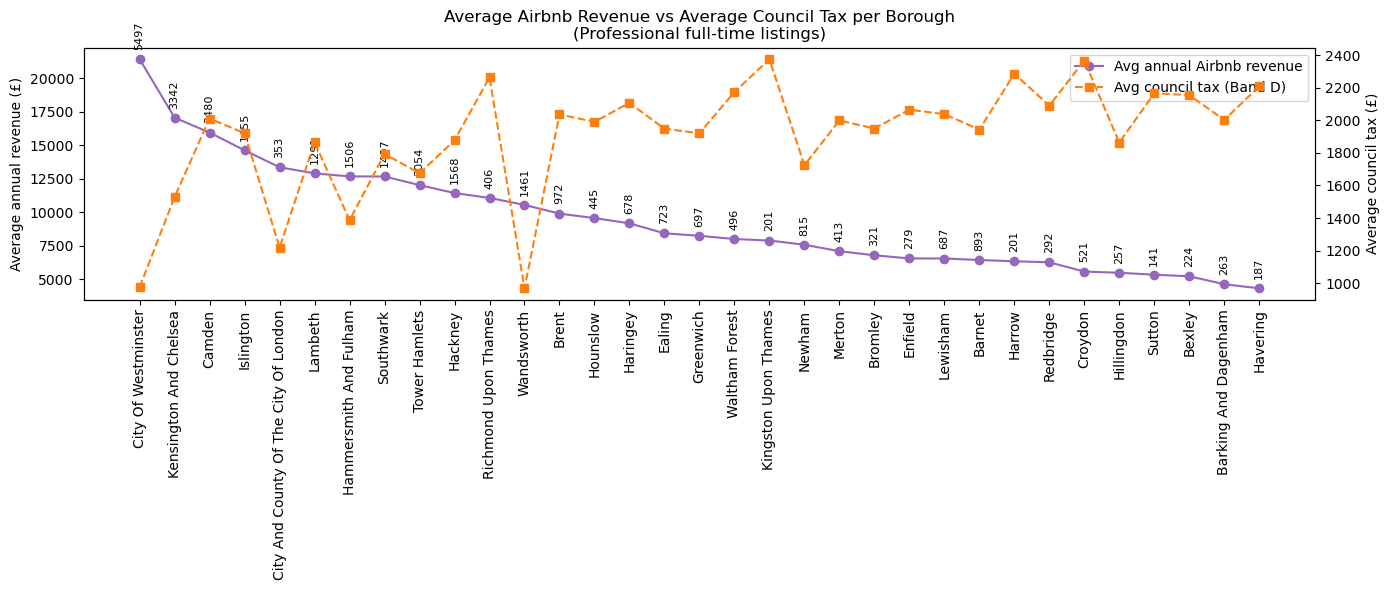

In [28]:
# Step 07 - Figure 01
# A combined line and point graph comparing:
#   (1) Average annual Airbnb revenue per borough
#   (2) Average council tax per borough (Band D)
#   (3) Number of professional full-time listings per borough (as labels above points)
# The x-axis is ordered by borough_summary (currently sorted by number of listings).

# Prep the x-axis labels and positions
# Convert borough names to Title Case for neat axis labels.
x_labels = borough_summary['borough_name'].str.title().tolist()

# Create a numeric position for each borough on the x-axis.
x_pos = np.arange(len(x_labels))

# Extract the series we want to plot from the summary table:
rev_vals = borough_summary['avg_airbnb_revenue'].values   # average annual revenue per borough
tax_vals = borough_summary['avg_council_tax'].values      # average council tax per borough
n_vals   = borough_summary['n_listings'].values           # number of listings per borough

# Create the base figure and first axis (for revenue)
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Line 1: Average Airbnb revenue per borough (left y-axis)
rev_line = ax1.plot(
    x_pos,
    rev_vals,
    marker='o',
    color='tab:purple',
    label='Avg annual Airbnb revenue'
)[0]

# Label the left y-axis for revenue and set the borough names on the x-axis.
ax1.set_ylabel('Average annual revenue (£)')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(x_labels, rotation=90)

# Create the second axis (for council tax) sharing the same x-axis
ax2 = ax1.twinx()

# Plot Line 2: Average council tax per borough (right y-axis)
tax_line = ax2.plot(
    x_pos,
    tax_vals,
    marker='s',
    linestyle='--',
    color='tab:orange',
    label='Avg council tax (Band D)'
)[0]

# Label the right y-axis for council tax.
ax2.set_ylabel('Average council tax (£)')

# Add the number of listings as text labels above the revenue points
# Calculate a small vertical offset so the labels sit just above the revenue markers.
offset = (rev_vals.max() - rev_vals.min()) * 0.04  # 4% off the revenue range

for x, y, n in zip(x_pos, rev_vals, n_vals):
    ax1.text(
        x,
        y + offset,
        str(n),            # show the count of listings
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=90
    )

# Combined legend for both lines
ax1.legend(
    [rev_line, tax_line],
    ['Avg annual Airbnb revenue', 'Avg council tax (Band D)'],
    loc='upper right'
)

# Final layout and title 
plt.title(
    'Average Airbnb Revenue vs Average Council Tax per Borough\n'
    '(Professional full-time listings)'
)

plt.tight_layout()
plt.show()

# ---- Output Figure ----
# Figure 01: Dual-axis line graph showing how average Airbnb revenue and average council tax
#            vary by borough, with listing counts labelled above each revenue point.

In [29]:
# Step 07b - Text Summary for Figure 01
# A short diagnostic summary of:
#   (1) Average annual revenue per borough
#   (2) Average council tax per borough
#   (3) Top / bottom revenue boroughs
#   (4) Correlation between revenue and council tax

# Ensure we use the same ordering as Figure 01 (highest → lowest revenue)
borough_summary_rev = (
    borough_summary
    .sort_values('avg_airbnb_revenue', ascending=False)
    .reset_index(drop=True)
)

# 1. Overall averages across all boroughs
overall_rev_mean = borough_summary_rev['avg_airbnb_revenue'].mean()
overall_tax_mean = borough_summary_rev['avg_council_tax'].mean()

# 2. Top 3 and bottom 3 boroughs by average annual revenue
top3 = borough_summary_rev.head(3)
bottom3 = borough_summary_rev.tail(3)

# 3. Simple Pearson correlation between revenue and council tax
#    (Measures whether high-tax boroughs also tend to have high average revenue.)
corr_rev_tax = borough_summary_rev['avg_airbnb_revenue'].corr(
    borough_summary_rev['avg_council_tax']
)

print("!! Summary for Figure 01: Revenue vs Council Tax by Borough !!\n")

# Overall averages
print(f"Overall average annual revenue per listing: £{overall_rev_mean:,.0f}")
print(f"Overall average council tax (Band D):      £{overall_tax_mean:,.0f}\n")

# Top 3 revenue boroughs
print("Top 3 boroughs by average annual Airbnb revenue:")
for _, row in top3.iterrows():
    print(
        f"  - {row['borough_name'].title()}: "
        f"£{row['avg_airbnb_revenue']:,.0f} avg revenue, "
        f"£{row['avg_council_tax']:,.0f} avg council tax, "
        f"{int(row['n_listings'])} listings"
    )

# Bottom 3 revenue boroughs
print("\nBottom 3 boroughs by average annual Airbnb revenue:")
for _, row in bottom3.iterrows():
    print(
        f"  - {row['borough_name'].title()}: "
        f"£{row['avg_airbnb_revenue']:,.0f} avg revenue, "
        f"£{row['avg_council_tax']:,.0f} avg council tax, "
        f"{int(row['n_listings'])} listings"
    )

# Correlation between revenue and tax
print("\nCorrelation between average revenue and average council tax:")
print(
    f"  Pearson r ≈ {corr_rev_tax:.2f}  "
    "(+1 = strong positive, 0 = no linear relationship, -1 = strong negative)"
)

!! Summary for Figure 01: Revenue vs Council Tax by Borough !!

Overall average annual revenue per listing: £9,421
Overall average council tax (Band D):      £1,906

Top 3 boroughs by average annual Airbnb revenue:
  - City Of Westminster: £21,414 avg revenue, £975 avg council tax, 5497 listings
  - Kensington And Chelsea: £17,049 avg revenue, £1,530 avg council tax, 3342 listings
  - Camden: £15,940 avg revenue, £2,011 avg council tax, 2480 listings

Bottom 3 boroughs by average annual Airbnb revenue:
  - Bexley: £5,216 avg revenue, £2,155 avg council tax, 224 listings
  - Barking And Dagenham: £4,625 avg revenue, £2,003 avg council tax, 263 listings
  - Havering: £4,318 avg revenue, £2,208 avg council tax, 187 listings

Correlation between average revenue and average council tax:
  Pearson r ≈ -0.64  (+1 = strong positive, 0 = no linear relationship, -1 = strong negative)


Overall, professional full-time listings earn an average of **£9,276** per year, while the average **Band D council tax is about £1,906**. 

The highest-earning boroughs are **City of Westminster** (~£20.7k, low tax ~£975, 6,658 listings),
**Kensington and Chelsea** (~£16.9k, £1,530 tax, 3,968 listings) and **Camden** (~£15.8k, £2,011 tax, 3,047 listings). 

At the other end, **Bexley**, **Barking and Dagenham** and **Havering** sit around **£4.5–5.1k** annual revenue with higher average council tax (~£2k–£2.2k) and far fewer listings (200–300 each). 

The Pearson correlation of **r ≈ −0.65** suggests a reasonably strong *negative* linear relationship: boroughs with **higher Airbnb revenue tend to have lower average council tax**, and vice versa.

In [30]:
# Step 08 - Council Tax Increase Scenario for Professional Hosts
# In this step we:
#   1) Compute current net profit (revenue - council tax).
#   2) Apply a +40% council tax scenario.
#   3) Measure how much profit each listing loses in % terms.
#   4) Flag listings that lose more than a chosen threshold (e.g. 40%).

# Filter only professional full-time entire homes.
# (All subsequent calculations are done only on this group.)
listings_prof = listings_gdf[listings_gdf['is_professional_host']].copy()
print("Number of professional full-time listings:", listings_prof.shape)

# Make sure the key numeric columns are actually numeric.
# This protects us from strings, blanks, etc.
listings_prof['annual_revenue'] = pd.to_numeric(
    listings_prof['annual_revenue'], errors='coerce'
)
listings_prof['council_tax'] = pd.to_numeric(
    listings_prof['council_tax'], errors='coerce'
)

# Drop rows that are missing revenue or council tax
before_na = len(listings_prof)
listings_prof = listings_prof.dropna(subset=['annual_revenue', 'council_tax']).copy()
print("   Dropped due to missing annual_revenue/council_tax:",
      before_na - len(listings_prof),
      "| remaining:", len(listings_prof))

# ------------------------------------------------------------
# 8.2 Current vs increased council tax
# ------------------------------------------------------------

# Current net profit for each listing (very simple model):
# net_profit_current = annual_revenue - current council tax.
listings_prof['net_profit_current'] = (
    listings_prof['annual_revenue'] - listings_prof['council_tax']
)

# Drop listings that are already not profitable BEFORE the tax rise.
# These are not really 'damaged' by the new policy because they were
# not making money to begin with.

before_profit = len(listings_prof)
listings_prof = listings_prof[listings_prof['net_profit_current'] > 0].copy()
print("   Dropped due to non-positive profit:",
      before_profit - len(listings_prof),
      "| remaining:", len(listings_prof))

# Apply the policy: increase council tax by 40%. ###################333
# (Change tax_increase_factor if you want to test another scenario.)
tax_increase_factor = 1.40   # 1.40 = +40%
listings_prof['council_tax_new'] = listings_prof['council_tax'] * tax_increase_factor

# Net profit AFTER the tax increase:
listings_prof['net_profit_new'] = (
    listings_prof['annual_revenue'] - listings_prof['council_tax_new'])

# Absolute loss in profit in £:
listings_prof['profit_loss_abs'] = (
    listings_prof['net_profit_current'] - listings_prof['net_profit_new'])

# Percentage loss in profit relative to original profit:
listings_prof['profit_loss_pct'] = (
    listings_prof['profit_loss_abs'] / listings_prof['net_profit_current'])

# Total number of listings in our profit model (after all filters above)
n_total_prof = len(listings_prof)

# ------------------------------------------------------------
# 8.3 Threshold-based loss flag (easily changeable)
# ------------------------------------------------------------

# Choose the policy threshold: ##################
# loss_threshold = 0.40  > loses more than 40% of its original profit.
loss_threshold = 0.40

# Flag listings that lose more than this % of their original profit.
listings_prof['loss_over_threshold'] = (
    listings_prof['profit_loss_pct'] > loss_threshold
)

# Count how many professional listings are heavily affected.
n_affected = listings_prof['loss_over_threshold'].sum()

# Share of professional listings that lose more than the threshold.
pct_affected = (n_affected / n_total_prof * 100) if n_total_prof > 0 else np.nan

print(
    f"Listings losing more than {loss_threshold:.0%} of profit: "
    f"{n_affected} out of {n_total_prof} "
    f"({pct_affected:.1f}% of professional full-time listings)"
)

# Convenience subset for mapping / plotting:
# listings_prof_affected contains only the 'heavily hit' listings.
listings_prof_affected = listings_prof[listings_prof['loss_over_threshold']].copy()

# Quick peek at the first few records used in the profit model.
display(
    listings_prof[
        ['borough_name', 'annual_revenue', 'council_tax', 'council_tax_new',
         'net_profit_current', 'net_profit_new',
         'profit_loss_pct', 'loss_over_threshold']
    ].head()
)

# ---- Output DataFrames ----
# listings_prof:
#   Professional full-time entire-home listings that:
#     - have valid annual_revenue and council_tax
#     - were profitable BEFORE the tax rise (net_profit_current > 0)
#   For each of these listings, we now have:
#     * net_profit_current      – profit before the 40% tax increase
#     * council_tax_new         – council tax after the 40% increase
#     * net_profit_new          – profit after the tax increase
#     * profit_loss_abs         – £ profit lost due to the tax increase
#     * profit_loss_pct         – % of original profit that was lost
#     * loss_over_threshold     – True/False flag: loses > 40% of profit

# listings_prof_affected:
#   Subset of listings_prof where loss_over_threshold == True.
#   These are the “heavily hit” professional listings that lose
#   more than 40% of their original profit under the new council tax.

Number of professional full-time listings: (26329, 17)
   Dropped due to missing annual_revenue/council_tax: 1013 | remaining: 25316
   Dropped due to non-positive profit: 9800 | remaining: 15516
Listings losing more than 40% of profit: 1839 out of 15516 (11.9% of professional full-time listings)


,borough_name,annual_revenue,council_tax,council_tax_new,net_profit_current,net_profit_new,profit_loss_pct,loss_over_threshold
0,lewisham,32670.0,2037.98,2853.172,30632.02,29816.828,0.026612,False
1,lewisham,3626.0,2037.98,2853.172,1588.02,772.828,0.513339,True
2,lewisham,8140.0,2037.98,2853.172,6102.02,5286.828,0.133594,False
3,lewisham,9216.0,2037.98,2853.172,7178.02,6362.828,0.113568,False
4,lewisham,5809.0,2037.98,2853.172,3771.02,2955.828,0.216173,False


In [31]:
# Step 09 - Borough share of listings losing >40% of profit
# Goal:
#   1) For each borough, count how many professional full-time listings
#      lose more than 40% of their original profit.
#   2) Express this as a percentage of all professional listings
#      in that borough.
#   3) This shows where hosts are *most likely* to be heavily hit
#      by the 40% council tax increase.

# Create a boolean flag for "heavily affected" listings
listings_prof['over_thresh'] = listings_prof['profit_loss_pct'] > loss_threshold

# Borough-level summary of exposure to the policy
borough_impact = (
    listings_prof
    .groupby('borough_name', as_index=False)
    .agg(
        total_listings=('id', 'count'),      # all professional full-time listings
        affected=('over_thresh', 'sum')          # how many lose >40% profit
    )
)

# Convert to percentage of listings in each borough
borough_impact['affected_share_pct'] = (
    borough_impact['affected'] / borough_impact['total_listings'] * 100
).round(1)

# Sort from most exposed borough to least
borough_impact = (
    borough_impact
    .sort_values('affected_share_pct', ascending=False)
    .reset_index(drop=True)
)

display(borough_impact)

# ---- Output table ----
# borough_impact = for each borough:
#   - total_listings: number of professional full-time listings
#   - affected: number of those losing >40% of profit
#   - affected_share_pct: % of listings in that borough that are heavily hit

,borough_name,total_listings,affected,affected_share_pct
0,havering,44,12,27.3
1,lewisham,251,64,25.5
2,enfield,84,20,23.8
3,merton,131,31,23.7
4,greenwich,236,56,23.7
5,barking and dagenham,68,16,23.5
6,croydon,161,37,23.0
7,hillingdon,89,20,22.5
8,bexley,49,11,22.4
9,barnet,343,76,22.2


#### **Figure 02** | Linear Relationship Between Revenue and Profit Loss

Using 14520 listings out of 15516 for the regression plot.


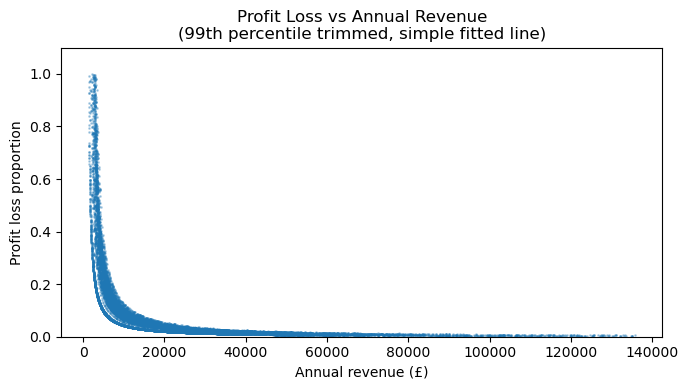

Approx regression: profit_loss_pct ≈ -0.0000 + 0.19469165 * annual_revenue


In [32]:
# Step 10 - Figure 03: Linear Relationship Between Revenue and Profit Loss
# In this step we:
#   1) Trim away extreme revenue outliers (top 1%) so the plot is readable.
#   2) Look only at listings with a sensible profit-loss value (0–100%).
#   3) Scatter-plot annual revenue vs % profit lost.
#   4) Fit a simple straight line (least-squares) just to see if there is
#      any clear linear pattern between revenue level and damage from the tax.

# Trim extremes so a few huge listings don't dominate the axes
rev_q99 = listings_prof['annual_revenue'].quantile(0.99)

# Keep only:
#   - Revenue below or equal to the 99th percentile
#   - Profit loss between 0 and 1 (0–100%)
mask = (
    (listings_prof['annual_revenue'] <= rev_q99) &
    (listings_prof['profit_loss_pct'] >= 0) &
    (listings_prof['profit_loss_pct'] <= 1)   # 0–100% loss
)

# Extract the x (revenue) and y (loss proportion) for the filtered sample
x = listings_prof.loc[mask, 'annual_revenue'].values
y = listings_prof.loc[mask, 'profit_loss_pct'].values

print(f"Using {mask.sum()} listings out of {len(listings_prof)} for the regression plot.")

# Safety check: only fit a line if we actually have data left
if len(x) > 1:
    # 10.2 – Fit a simple linear regression: y ≈ a + b * x
    # (Minimal, hand-rolled regression just to get a trend line.)
    a, b = np.polyfit(x, y, 1)

    # Plot the scatter and the fitted line
    fig, ax = plt.subplots(figsize=(7, 4))

    # Each point = one professional listing (after trimming)
    ax.scatter(x, y, s=1, alpha=0.3)

    # Generate a smooth line over the observed revenue range
    x_line = np.linspace(x.min(), x.max(), 100)
    ax.plot(x_line, a + b * x_line, linewidth=2)

    ax.set_xlabel('Annual revenue (£)')
    ax.set_ylabel('Profit loss proportion')
    ax.set_title(
        'Profit Loss vs Annual Revenue\n'
        '(99th percentile trimmed, simple fitted line)'
    )

    # Keep y-axis in a sane range; cap around the max observed loss
    ax.set_ylim(0, max(y.max() * 1.1, 0.5))

    plt.tight_layout()
    plt.show()

    # Print the approximate regression equation for interpretation in the text
    print(f"Approx regression: profit_loss_pct ≈ {a:.4f} + {b:.8f} * annual_revenue")
else:
    print("Not enough data after filtering to fit a regression line.")


    ###############move this uppppppppppppppppppppppp

Just to make sure of non-linarity (MAYBE USELESS) or MAYBE this NEEDS TO BE MERGED WITH TAX DATA DUNNO This plot shows the relationship between annual revenue (£, x-axis) and the proportion of profit lost after a 40% council-tax increase (y-axis) for all professional, currently profitable listings (trimmed at the 99th percentile of revenue). The pattern is clearly non-linear: listings with low annual revenue experience very high proportional losses (up to 100% of their original profit), while as revenue increases the loss proportion rapidly collapses towards zero, meaning high-earning listings barely feel the tax change in percentage terms. The fitted straight line and printed regression formula are not meaningful here, because a linear model cannot capture this strongly curved, 1/x-type relationship; interpretation should rely on the visual pattern, which shows that the policy hits low-profit listings hardest, while most higher-revenue professional listings see only modest proportional losses.

#### **Figure 03** | Spatial Point Map of the 12.1% of listings that have had more than 40% loss of profit

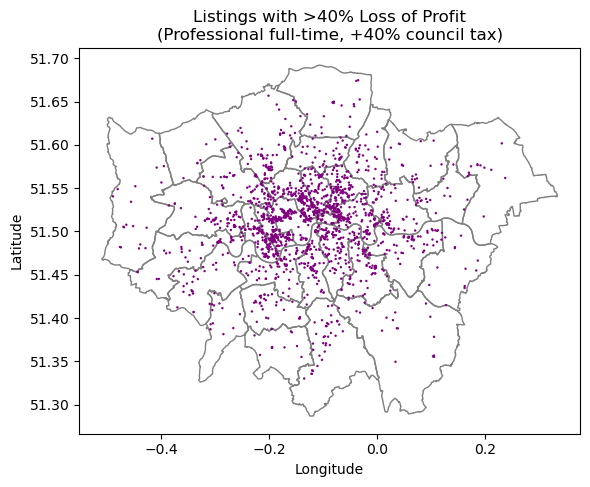

In [33]:
# Step 11 - Figure 03
# Spatial map of the *heavily affected* listings

# In this figure we show:
#   - Only professional full-time listings that lose >40% of their
#     original profit under the +40% council tax scenario
#     (loss_over_threshold == True -> listings_prof_affected).
#   - Borough polygons are drawn in the background.
#   - Purple dots show where highly impacted listings are clustered.

fig, ax = plt.subplots(figsize=(6, 6))

# Plot the borough boundaries as a neutral backdrop.
borough_tax.plot(
    ax=ax,
    edgecolor='grey',
    facecolor='none'
)

# Overlay only the "heavily hit" listings (>40% profit loss).
listings_prof_affected.plot(
    ax=ax,
    edgecolor='none',
    facecolor='purple',
    markersize=3
)

# Titles & axes labels.
ax.set_title(
    'Listings with >40% Loss of Profit\n'
    '(Professional full-time, +40% council tax)'
)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

# ---- Output Figure ----
# Figure 02: Point map of professional full-time listings that lose
#            more than 40% of their original profit, plotted against
#            the London borough boundaries.

In [34]:
# Step 12 - Text summary for borough exposure to >40% profit loss
# Context:
#   - In Step 08 we worked at the *listing level*:
#       * For each professional full-time listing we calculated:
#           - net_profit_current       (before tax increase)
#           - net_profit_new           (after +40% council tax)
#           - profit_loss_pct          (% of original profit lost)
#       * We flagged listings losing more than 40% of their profit
#         with loss_over_threshold / over_thresh.
#   - In Step 09 we moved to the *borough level*:
#       * borough_impact aggregates listing results into:
#           - total_listings          – number of professional full-time listings
#           - affected                – number losing > 40% of profit
#           - affected_share_pct      – % of listings heavily hit in that borough
#
# This text block now summarises Step 09 in words:
# Where does the 40% council tax increase bite hardest in *relative* terms?

print("!!Summary for Step 09: Borough exposure to >40% profit loss!!\n")

# Overall numbers across all boroughs:
#   How many professional listings lose >40% of profit *in total*,
#   and what % of all professional listings that represents.
overall_total = borough_impact['total_listings'].sum()
overall_affected = borough_impact['affected'].sum()
overall_share = overall_affected / overall_total * 100 if overall_total > 0 else float("nan")

print(
    f"Across all boroughs, {overall_affected:,} out of {overall_total:,} "
    f"professional full-time listings lose more than 40% of their original profit "
    f"({overall_share:.1f}% overall).\n"
)

# Top 5 boroughs by *share* of listings losing >40% of profit
# (not by raw counts, but by % of local hosts heavily hit).
top5 = borough_impact.head(5)

print("Top 5 boroughs by share of listings losing >40% of profit:")
for _, row in top5.iterrows():
    print(
        f"  - {row['borough_name'].title()}: "
        f"{int(row['affected'])} out of {int(row['total_listings'])} listings "
        f"({row['affected_share_pct']:.1f}% heavily affected)"
    )

# Bottom 3 boroughs (least exposed to the policy in % terms).
bottom3 = borough_impact.tail(3)

print("\nBottom 3 boroughs by share of listings losing >40% of profit:")
for _, row in bottom3.iterrows():
    print(
        f"  - {row['borough_name'].title()}: "
        f"{int(row['affected'])} out of {int(row['total_listings'])} listings "
        f"({row['affected_share_pct']:.1f}% heavily affected)"
    )

print(
    "\nThese figures show where the 40% council tax increase *bites hardest* in "
    "relative terms (high affected_share_pct), even if some of those boroughs "
    "do not have the largest absolute number of listings."
)

# ---- Output Text ----
# Console narrative explaining:
#   - Overall share of professional listings losing >40% of profit.
#   - Which boroughs have the highest and lowest *proportion* of heavily hit hosts,
#     complementing the listing-level analysis from Step 08 and the maps that follow.

!!Summary for Step 09: Borough exposure to >40% profit loss!!

Across all boroughs, 1,839 out of 15,516 professional full-time listings lose more than 40% of their original profit (11.9% overall).

Top 5 boroughs by share of listings losing >40% of profit:
  - Havering: 12 out of 44 listings (27.3% heavily affected)
  - Lewisham: 64 out of 251 listings (25.5% heavily affected)
  - Enfield: 20 out of 84 listings (23.8% heavily affected)
  - Merton: 31 out of 131 listings (23.7% heavily affected)
  - Greenwich: 56 out of 236 listings (23.7% heavily affected)

Bottom 3 boroughs by share of listings losing >40% of profit:
  - Wandsworth: 63 out of 660 listings (9.5% heavily affected)
  - Kensington And Chelsea: 151 out of 1812 listings (8.3% heavily affected)
  - City Of Westminster: 123 out of 3246 listings (3.8% heavily affected)

These figures show where the 40% council tax increase *bites hardest* in relative terms (high affected_share_pct), even if some of those boroughs do not have t

#### **Figure 04** | Map of Average Profit Loss per Borough

Range of average loss: 7.5% – 34.8%


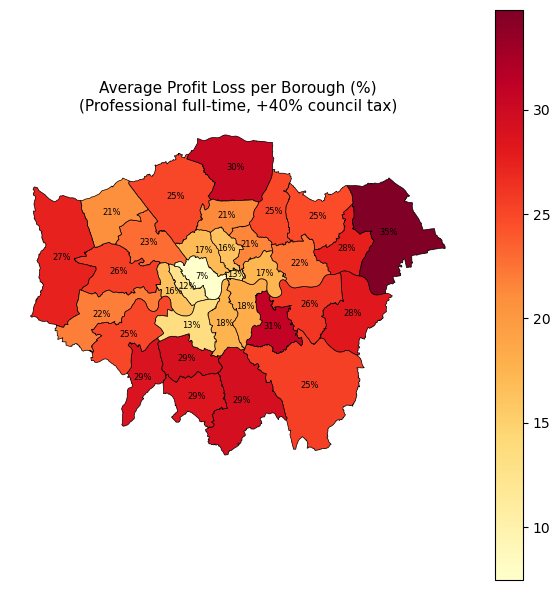

In [180]:
# Step 13 - Figure 04: Map of Average Profit Loss per Borough
#
# What this figure shows:
#   - For each borough, we take the *average % profit loss* across all
#     professional full-time listings (not just the ones over 40%).
#   - This is stored in `avg_loss_pct_percent` on `borough_loss_map_proj`.
#   - We then:
#       1) Read the true min/max of those averages (e.g. ~7–35%).
#       2) Use that range to colour a choropleth (no fake 0–100 scale).
#       3) Shade boroughs with a strong yellow–orange–red palette.
#       4) Print the average % loss label in the middle of each borough.
#
# Conceptually:
#   - Step 08: listing-level profit loss.
#   - Step 09: for each borough, share of listings losing >40%.
#   - Step 13: for each borough, *average* profit loss %, regardless of threshold.

fig, ax = plt.subplots(figsize=(6, 6))

# Use the projected version of the boroughs for cleaner centroids/labels.
# (If you never created borough_loss_map_proj, fallback could be borough_loss_map.)
gdf = borough_loss_map_proj

# 13.1 – Check the actual range of average % loss across boroughs
vmin = gdf['avg_loss_pct_percent'].min()
vmax = gdf['avg_loss_pct_percent'].max()

print(f"Range of average loss: {vmin:.1f}% – {vmax:.1f}%")

# 13.2 – Draw the choropleth using that tighter range
# We deliberately use vmin/vmax from the data so the colours spread across
# the real values (e.g. ~7–35%), instead of fading out over a full 0–100 scale.
gdf.plot(
    column='avg_loss_pct_percent',
    cmap='YlOrRd',      # yellow → orange → red, more visual contrast
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    vmin=vmin,          # stay within actual range of the data
    vmax=vmax,
    ax=ax
)

ax.set_axis_off()
ax.set_title(
    "Average Profit Loss per Borough (%)\n"
    "(Professional full-time, +40% council tax)",
    fontsize=11
)

# 13.3 – Add text labels at borough centroids showing the % loss
centroids = gdf.geometry.centroid

for (_, row), point in zip(gdf.iterrows(), centroids):
    if pd.isna(row['avg_loss_pct_percent']):
        # Skip any boroughs with missing loss values (if any)
        continue
    ax.text(
        point.x,
        point.y,
        f"{row['avg_loss_pct_percent']:.0f}%",  # whole % for readability
        ha='center',
        va='center',
        fontsize=6,
        color='black'
    )

plt.tight_layout()
plt.show()

# ---- Output Figure ----
# Figure 04: Choropleth map where each borough is shaded by its *average*
#            % profit loss under a +40% council tax scenario for professional
#            full-time listings, with the exact % printed inside each borough.
#            This complements Step 09: instead of “how many cross the 40% line?”,
#            it answers “on average, how hard does the tax hit hosts in this borough?”

This choropleth shows the average percentage loss of profit per professional full-time Airbnb listing in each London borough after a 40% increase in council tax. Average losses range from around 7–18% in the central boroughs (City of London, Westminster, Kensington & Chelsea and neighbours) up to roughly 30–35% in several outer boroughs, particularly in the north-east and south-east. In other words, while all boroughs see a meaningful reduction in profit, outer London hosts are hit hardest on average, losing roughly a third of their net profit, whereas central London hosts lose closer to 10–20%.